In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
image=cv2.imread('./images/Find_Truck_color.jpg')

In [3]:
cv2.imshow('Find a truck template matching', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
height,width=image.shape[:2]

In [5]:
print('Height: ',str(height),'\n','Width: ',str(width))

Height:  628 
 Width:  1194


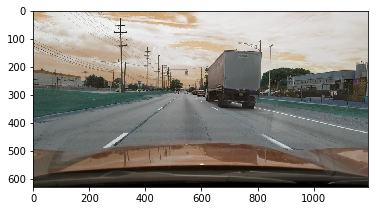

In [6]:
plt.imshow(image)

In [7]:
image_gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

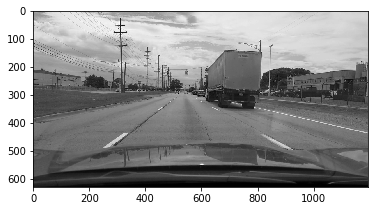

In [8]:
plt.imshow(image_gray,cmap='gray')

In [9]:
image_gray.shape

(628, 1194)

### Load template

In [10]:
template_image=cv2.imread('./images/Truck_template.jpg',0)

In [11]:
cv2.imshow('Truck Template', template_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [12]:
h,w=template_image.shape[:2]

In [13]:
print(h,' ',w)

209   200


### Template matching

In [14]:
result=cv2.matchTemplate(image_gray, template_image, cv2.TM_CCOEFF_NORMED)
result.shape

(420, 995)

In [15]:
cv2.imshow('Mathcing template', result)
cv2.waitKey()
cv2.destroyAllWindows()

### Find the indices of the object to find

In [16]:
min_val, max_val, min_loc, max_loc =cv2.minMaxLoc(result)

In [17]:
max_loc

(616, 142)

In [18]:
min_loc

(845, 225)

In [19]:
min_val

-0.5980254411697388

In [20]:
max_val

0.9989968538284302

In [21]:
# Draw a box around the object (if found)
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(image, top_left, bottom_right, (0,0,255), 5)

array([[[204, 185, 170],
        [206, 187, 172],
        [209, 190, 175],
        ...,
        [214, 210, 209],
        [214, 210, 209],
        [212, 210, 209]],

       [[215, 196, 181],
        [216, 198, 181],
        [218, 200, 183],
        ...,
        [214, 210, 209],
        [215, 211, 210],
        [213, 211, 210]],

       [[219, 199, 182],
        [217, 199, 182],
        [218, 200, 183],
        ...,
        [215, 211, 210],
        [216, 212, 211],
        [214, 212, 211]],

       ...,

       [[ 34,  31,  26],
        [ 34,  31,  26],
        [ 34,  31,  26],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[ 33,  30,  25],
        [ 33,  30,  25],
        [ 33,  30,  25],
        ...,
        [  1,   1,   1],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 32,  29,  24],
        [ 32,  29,  24],
        [ 31,  28,  23],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [22]:
cv2.imshow('Located Truck', image)
cv2.waitKey()
cv2.destroyAllWindows()